(968, 1292, 3)
(968, 1292)


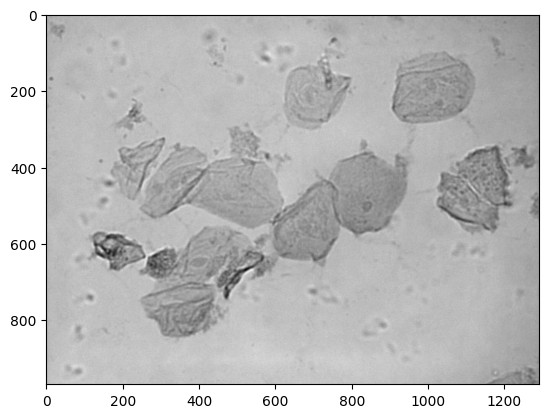

In [4]:
import cv2 as cv
import numpy as np
import io
from matplotlib import pyplot as plt
import math

img = plt.imread('A1 - P10.jpg')
print(img.shape)
assert img is not None, "file could not be read, check with os.path.exists()"
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
rows,cols = gimg.shape
plt.imshow(gimg, 'gray')
print(gimg.shape)

##Laplace

In [129]:
laplacian_kernel = np.array([[-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])

laplacian_kernel_1 = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

laplacian_kernel_2 = np.array([[1, 1, 1],
                              [1, -8, 1],
                              [1, 1, 1]])

laplacian_kernel_3 = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])


mask_V = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

mask_H = np.array([[-1, -2, -1],
                      [0, 0, 0],
                     [1, 2, 1]])




In [130]:
def convolution(imagem, kernel, kernel_size):
   
    filtered_image = np.zeros_like(imagem)
    pad_size = kernel_size 
    imagem_pad = np.pad(imagem, [(pad_size, pad_size), (pad_size, pad_size)], mode='constant')

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            window = imagem_pad[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.sum(window * kernel)
            #if filtered_image[i, j] != 0:
                #print(filtered_image[i, j])

    return filtered_image

In [131]:


def convolucao(imagem, kernel, kernel_size):
    imagem_filtrada = np.zeros_like(imagem)
    pad_size = kernel_size // 2
    imagem_pad = np.pad(imagem, [(pad_size, pad_size), (pad_size, pad_size)], mode='constant')

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            window = imagem_pad[i:i+kernel_size, j:j+kernel_size]
            imagem_filtrada[i, j] = np.sum(window * kernel)
            #if imagem_filtrada[i, j] != 0:
                #print(imagem_filtrada[i, j])

    return imagem_filtrada

In [132]:
laplacian_image = convolution(gimg, laplacian_kernel_3, laplacian_kernel_3.shape[0])

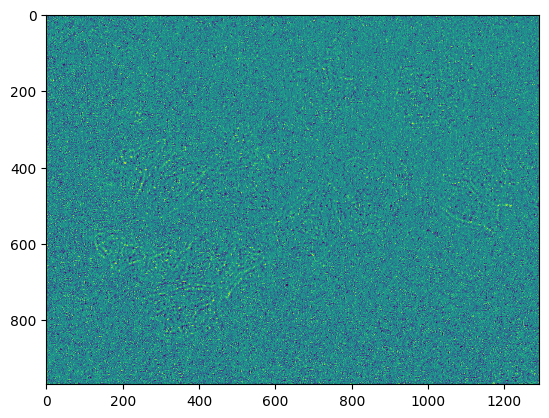

In [133]:
plt.imshow(laplacian_image)


In [134]:
bs = 1
ext_gimg = cv.copyMakeBorder(gimg,bs,bs,bs,bs,cv.BORDER_REPLICATE)



sobel_H = np.zeros((rows, cols), dtype="int")
sobel_V = np.zeros((rows, cols), dtype="int")
laplacian = np.zeros((rows, cols), dtype="int")

elements = (bs+bs+1)*(bs+bs+1)
for y in np.arange(bs, rows + bs):
    for x in np.arange(bs, cols + bs):
        roi = ext_gimg[y - bs:y + bs + 1, x - bs:x + bs + 1]
        mult = mask_V * roi
        sobel_V[y - bs, x - bs] = mult.sum()
        mult = mask_H * roi
        sobel_H[y - bs, x - bs] = mult.sum()
        mult = laplacian_kernel_3 * roi
        laplacian[y - bs, x - bs] = mult.sum()
grad = sobel_V + sobel_H

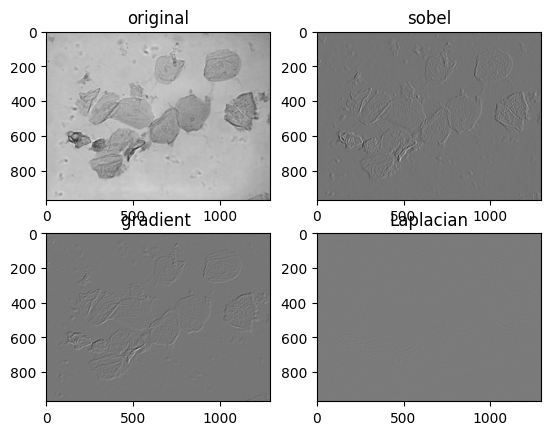

In [135]:
plt.subplot(221),plt.imshow(gimg,'gray'),plt.title('original')
plt.subplot(223),plt.imshow(grad,'gray'),plt.title('gradient ')
plt.subplot(224),plt.imshow(laplacian,'gray'),plt.title('Laplacian')
plt.subplot(222),plt.imshow(sobel_V,'gray'),plt.title('sobel')
plt.show()

In [136]:
image_sum = laplacian + gimg
image_sum_2 = grad + gimg + sobel_V
image_sum_3 = image_sum + image_sum_2 

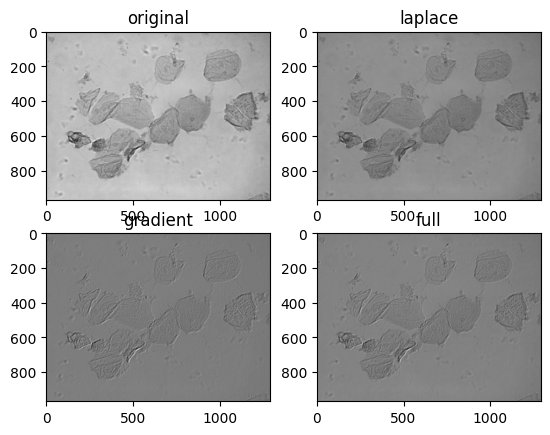

In [137]:
plt.subplot(221),plt.imshow(gimg,'gray'),plt.title('original')
plt.subplot(222),plt.imshow(image_sum,'gray'),plt.title('laplace')
plt.subplot(223),plt.imshow(image_sum_2,'gray'),plt.title('gradient')
plt.subplot(224),plt.imshow(image_sum_3,'gray'),plt.title('full')
plt.show()

##Unsharp

In [138]:
def Gaussian_kernel(tamanho, sigma_x):
   
    centro = tamanho 
    sigma_x_2 = sigma_x * sigma_x
    x, y = np.meshgrid(np.arange(tamanho), np.arange(tamanho))
    distancia_quadrada = (x - centro)**2 + (y - centro)**2
    exponencial = -distancia_quadrada / (2 * sigma_x_2)
    kernel = np.exp(exponencial)
    kernel /= np.sum(kernel)
    return kernel

tamanho_kernel = 5  
sigma_x = 0
kernel = Gaussian_kernel(tamanho_kernel, sigma_x)

print(Gaussian_kernel)

imagem_desfocada = convolucao(gimg, kernel, tamanho_kernel)

/var/folders/w6/26v1cd9142s5h4lqlvz_zqpr0000gn/T/ipykernel_1272/1937697654.py:7: RuntimeWarning: divide by zero encountered in divide
  exponencial = -distancia_quadrada / (2 * sigma_x_2)
/var/folders/w6/26v1cd9142s5h4lqlvz_zqpr0000gn/T/ipykernel_1272/1937697654.py:9: RuntimeWarning: invalid value encountered in divide
  kernel /= np.sum(kernel)
/var/folders/w6/26v1cd9142s5h4lqlvz_zqpr0000gn/T/ipykernel_1272/2330009331.py:9: RuntimeWarning: invalid value encountered in cast
  imagem_filtrada[i, j] = np.sum(window * kernel)


<function Gaussian_kernel at 0x15b7b60c0>


In [139]:
imagem_detalhes = gimg - imagem_desfocada

(<Axes: title={'center': 'unsharp'}>,
 Text(0.5, 1.0, 'unsharp'))

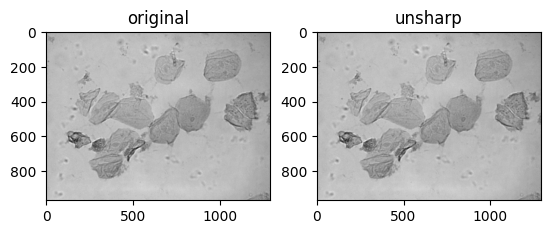

In [140]:
plt.subplot(221),plt.imshow(gimg,'gray'),plt.title('original')
plt.subplot(222),plt.imshow(imagem_detalhes,'gray'),plt.title('unsharp')

(<Axes: title={'center': 'unsharp + origin'}>,
 Text(0.5, 1.0, 'unsharp + origin'))

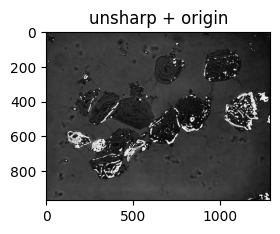

In [141]:
img_out = imagem_detalhes + gimg
plt.subplot(221),plt.imshow(img_out,'gray'),plt.title('unsharp + origin')

(<Axes: title={'center': 'original'}>,
 Text(0.5, 1.0, 'original'))

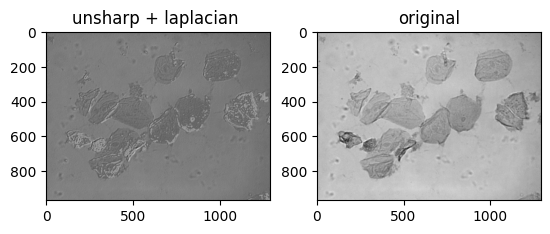

In [142]:
sum_img = image_sum_3 + img_out
plt.subplot(221),plt.imshow(sum_img,'gray'),plt.title('unsharp + laplacian ')
plt.subplot(222),plt.imshow(gimg,'gray'),plt.title('original')

(1, 3)


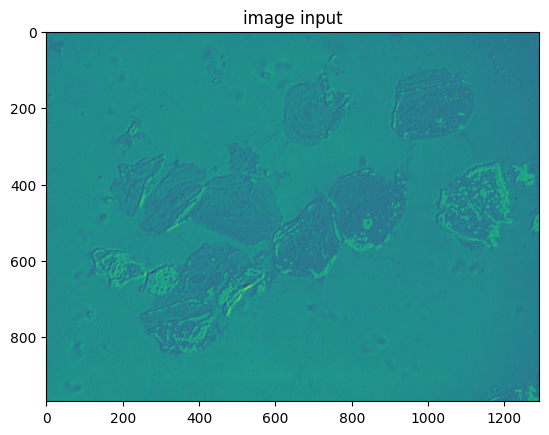

In [143]:
x= np.resize(img_out,(1,3))
print(x.shape)
newImg = img+x
plt.imshow(sum_img)
plt.title('image input')
plt.show()

In [144]:
import numpy as np

def kernel_gaussiano(tamanho, sigma_x):
    """
    Função para criar um kernel gaussiano.

    Args:
        tamanho (int): Tamanho do kernel (par ou ímpar).
        sigma_x (float): Desvio padrão em relação ao eixo x.

    Returns:
        numpy.ndarray: Kernel gaussiano.
    """
    centro = tamanho // 2
    sigma_x_2 = sigma_x * sigma_x
    x, y = np.meshgrid(np.arange(tamanho), np.arange(tamanho))
    distancia_quadrada = (x - centro)**2 + (y - centro)**2
    exponencial = -distancia_quadrada / (2 * sigma_x_2)
    kernel = np.exp(exponencial)
    kernel /= np.sum(kernel)
    return kernel

tamanho_kernel = 5  # Tamanho do kernel gaussiano (par ou ímpar)
sigma_x = 1  # Desvio padrão em relação ao eixo x
kernel_gaussiano = kernel_gaussiano(tamanho_kernel, sigma_x)

imagem_suavizada = convolucao(gimg, kernel_gaussiano, tamanho_kernel)

In [145]:
def sobel_x(imagem):
    """
    Função para calcular o gradiente horizontal usando o operador Sobel.

    Args:
        imagem (numpy.ndarray): Imagem suavizada.

    Returns:
        numpy.ndarray: Gradiente horizontal (Gx).
    """
    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return convolucao(imagem, sobel_x_kernel, 3)

def sobel_y(imagem):
    """
    Função para calcular o gradiente vertical usando o operador Sobel.

    Args:
        imagem (numpy.ndarray): Imagem suavizada.

    Returns:
        numpy.ndarray: Gradiente vertical (Gy).
    """
    sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return convolucao(imagem, sobel_y_kernel, 3)

Gx = sobel_x(imagem_suavizada)
Gy = sobel_y(imagem_suavizada)

In [146]:
magnitude = np.sqrt(Gx**2 + Gy**2)
angulo = np.arctan2(Gy, Gx) * 180 / np.pi  # Converter para graus

In [147]:
def supressao_nao_maxima(magnitude, angulo):
    """
    Função para aplicar supressão não máxima.

    Args:
        magnitude (numpy.ndarray): Magnitude do gradiente.
        angulo (numpy.ndarray): Ângulo do gradiente.

    Returns:
        numpy.ndarray: Imagem com bordas suprimidas.
    """
    direcoes = np.array([0, 45, 90, 135])
    nova_magnitude = np.zeros_like(magnitude)

    for i in range(magnitude.shape[0]):
        for j in range(magnitude.shape[1]):
            direcao = direcoes[np.argmin(np.abs(angulo[i, j] - direcoes))]
            q = (j + np.cos(direcao * np.pi / 180)) if j + np.cos(direcao * np.pi / 180) >= 0 else 0
            r = (i + np.sin(direcao * np.pi / 180)) if i + np.sin(direcao * np.pi / 180) >= 0 else 0
            p = (j - np.cos(direcao * np.pi / 180)) if j - np.cos(direcao * np.pi / 180) >= 0 else 0
            s = (i - np.sin(direcao * np.pi / 180)) if i - np.sin(direcao * np.pi / 180) >= 0 else 0
            
            if magnitude[i, j] >= magnitude[int(r-1), int(q-1)] and magnitude[i, j] >= magnitude[int(s), int(p)]:
                nova_magnitude[i, j] = magnitude[i, j]

    return nova_magnitude

In [148]:

x = supressao_nao_maxima(magnitude, angulo)


In [149]:

def limiarizacao(magnitude, min_threshold, max_threshold):
    """
    Função para aplicar limiarização.

    Args:
        magnitude (numpy.ndarray): Magnitude do gradiente com supressão não máxima.
        min_threshold (float): Limiar mínimo de magnitude.
        max_threshold (float): Limiar máximo de magnitude.

    Returns:
        numpy.ndarray: Imagem com bordas binarizadas.
    """
    imagem_bordas = np.zeros_like(magnitude)
    forte = np.logical_and(magnitude >= max_threshold, magnitude > 0)
    fraco = np.logical_and(magnitude >= min_threshold, magnitude < max_threshold)
    imagem_bordas[forte] = 255
    imagem_bordas[fraco] = imagem_bordas[fraco] * (magnitude[fraco] / min_threshold)
    return imagem_bordas

minThreshold = 0.1  # Limiar mínimo de magnitude
maxThreshold = 0.2  # Limiar máximo de magnitude
imagem_bordas = limiarizacao(x, min_threshold, max_threshold)

In [150]:
def rastreamento_bordas(imagem_bordas):
    """
    Função para realizar rastreamento de bordas.

    Args:
        imagem_bordas (numpy.ndarray): Imagem binarizada com bordas.

    Returns:
        numpy.ndarray: Imagem final com bordas rastreadas.
    """
    bordas_rastreio = np.zeros_like(imagem_bordas)
    for i in range(1, imagem_bordas.shape[0] - 1):
        for j in range(1, imagem_bordas.shape[1] - 1):
            if imagem_bordas[i, j] == 255:
                bordas_rastreio = rastreamento_recursivo(imagem_bordas, bordas_rastreio, i, j)

    return bordas_rastreio

def rastreamento_recursivo(imagem_bordas, bordas_rastreio, i, j):
    """
    Função recursiva para rastreamento de bordas.

    Args:
        imagem_bordas (numpy.ndarray): Imagem binarizada com bordas.
        bordas_rastreio (numpy.ndarray): Imagem para armazenar bordas rastreadas.
        i (int): Coordenada x do pixel atual.
        j (int): Coordenada y do pixel atual.

    Returns:
        numpy.ndarray: Imagem com bordas rastreadas atualizada.
    """
    bordas_rastreio[i, j] = 255
    vizinhos = [(i-1, j), (i+1, j), (i, j-1), (i, j+1), (i-1, j-1), (i+1, j-1), (i-1, j+1), (i+1, j+1)]

    for x, y in vizinhos:
        if 0 <= x < imagem_bordas.shape[0] and 0 <= y < imagem_bordas.shape[1] and \
            imagem_bordas[x, y] >= 255 and bordas_rastreio[x, y] == 0:
            bordas_rastreio = rastreamento_recursivo(imagem_bordas, bordas_rastreio, x, y)

    return bordas_rastreio

imagem_bordas_rastreadas = rastreamento_bordas(imagem_bordas)

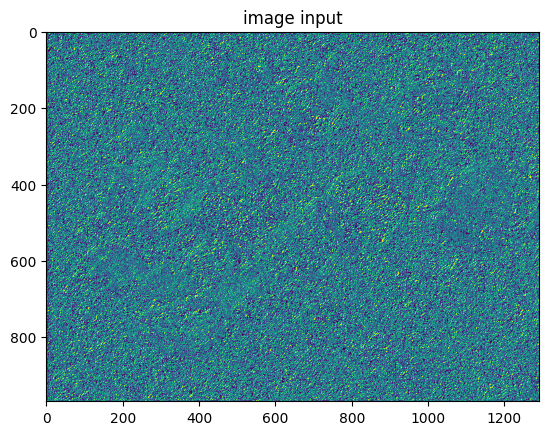

In [151]:
plt.imshow(imagem_bordas_rastreadas)
plt.title('image input')
plt.show()

In [152]:
bordas_canny = cv.Canny(gimg, minThreshold, maxThreshold)

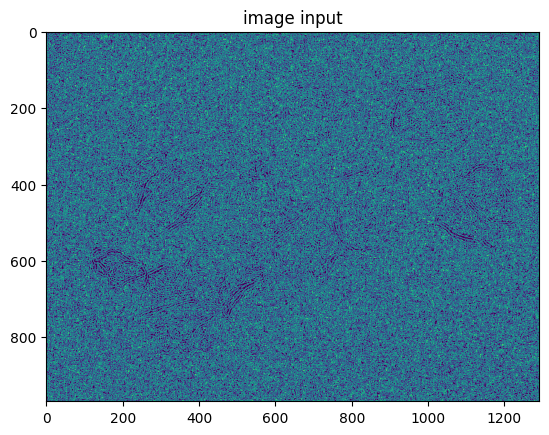

In [153]:
plt.imshow(bordas_canny)
plt.title('image input')
plt.show()

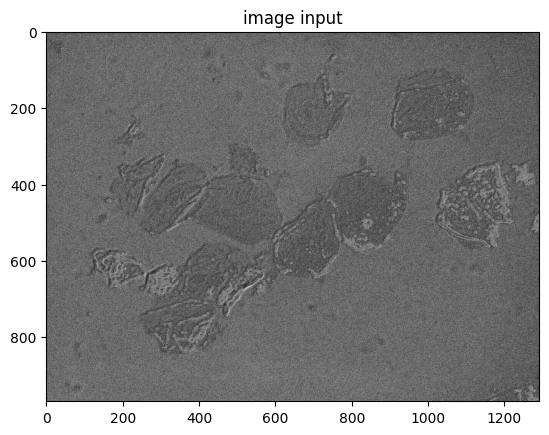

In [160]:
img_canny = bordas_canny + sum_img
plt.imshow(img_canny,'gray')
plt.title('image input')
plt.show()

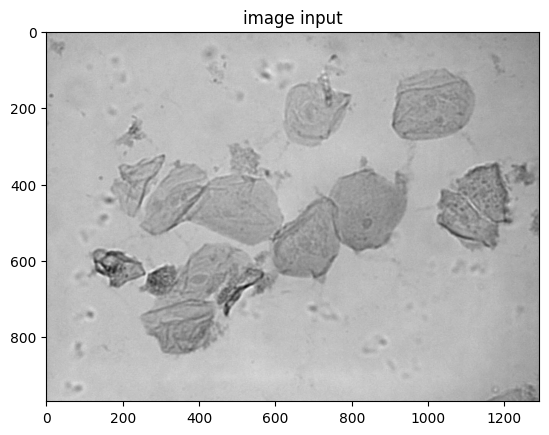

In [158]:
plt.imshow(gimg,'gray')
plt.title('image input')
plt.show()

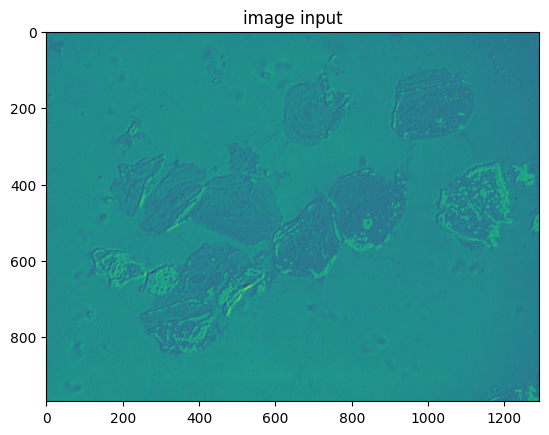

In [161]:
plt.imshow(sum_img)
plt.title('image input')
plt.show()


In [5]:
sobel_x = cv.Sobel(gimg, cv.CV_64F, 1, 0)
sobel_y = cv.Sobel(gimg, cv.CV_64F, 0, 1)

magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
direcao = np.arctan2(sobel_y, sobel_x) * 180 / np.pi

In [6]:
acumulacao = np.zeros_like(gimg)

In [7]:
for i in range(gimg.shape[0]):
    for j in range(gimg.shape[1]):
        # Obter a direção do gradiente no pixel atual
        direcao_pixel = direcao[i, j]

        # Obter os pixels vizinhos na direção do gradiente
        vizinhos = [(i-1, j-1), (i-1, j), (i-1, j+1), (i, j-1), (i, j+1), (i+1, j-1), (i+1, j), (i+1, j+1)]

        # Encontrar o pixel vizinho com menor altitude (maior valor de acumulação)
        menor_altitude = acumulacao[i, j]
        menor_indice = (i, j)

        for x, y in vizinhos:
            if 0 <= x < gimg.shape[0] and 0 <= y < gimg.shape[1]:
                if acumulacao[x, y] < menor_altitude:
                    menor_altitude = acumulacao[x, y]
                    menor_indice = (x, y)

        # Adicionar a magnitude do gradiente à acumulação no pixel atual
        acumulacao[i, j] = magnitude[i, j] + menor_altitude

In [21]:
bordas = acumulacao > 10

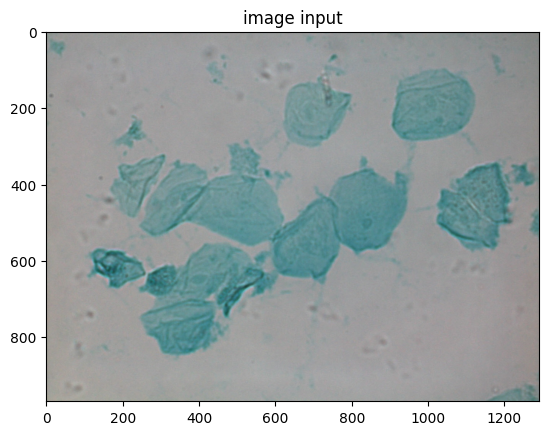

In [22]:
plt.imshow(img)
plt.title('image input')
plt.show()

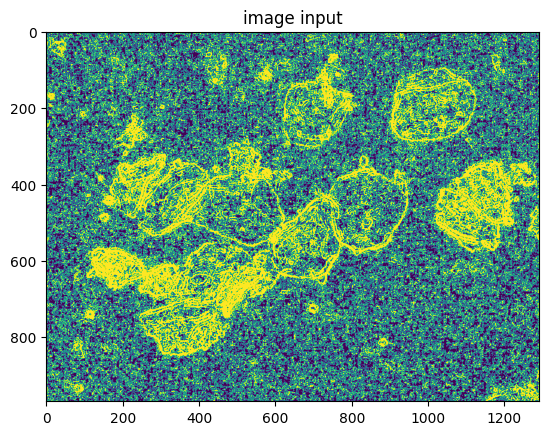

In [23]:
plt.imshow(bordas.astype('uint8') * 255)
plt.title('image input')
plt.show()

In [25]:
img_result = gimg + bordas

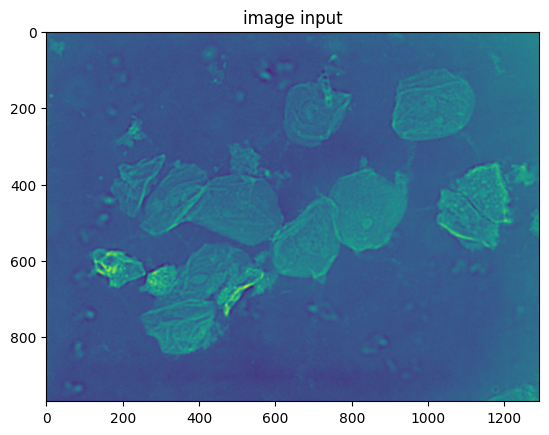

In [26]:
plt.imshow(img_result.astype('uint8') * 255)
plt.title('image input')
plt.show()

In [2]:
import cv2
import numpy as np

In [3]:
imagem_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [4]:
gx = cv2.Sobel(imagem_hsv[:,:,0], cv2.CV_64F, 1, 0)
gy = cv2.Sobel(imagem_hsv[:,:,0], cv2.CV_64F, 0, 1)

magnitude = np.sqrt(gx**2 + gy**2)
direcao = np.arctan2(gy, gx)

In [5]:
limiar_magnitude = 50
limiar_direcao = 45

mascara_bordas = np.zeros_like(magnitude)

mascara_bordas[np.where(magnitude > limiar_magnitude)] = 1

bordas_orientadas = np.zeros_like(direcao)

bordas_orientadas[np.where(magnitude > limiar_magnitude)] = direcao[np.where(magnitude > limiar_magnitude)]

In [6]:
def supressao_nao_maxima(bordas_orientadas, mascara_bordas):
    altura, largura = bordas_orientadas.shape

    bordas_orientadas_com_angulo = np.zeros((altura + 2, largura + 2))
    mascara_bordas_com_angulo = np.zeros((altura + 2, largura + 2))

    bordas_orientadas_com_angulo[1:-1, 1:-1] = bordas_orientadas
    mascara_bordas_com_angulo[1:-1, 1:-1] = mascara_bordas

    for i in range(1, altura + 1):
        for j in range(1, largura + 1):
            if mascara_bordas_com_angulo[i, j] == 0:
                continue

            angulo = bordas_orientadas_com_angulo[i, j]

            q = int(angulo // 45)
            r = int((angulo + 45) // 90)
            s = int((angulo + 135) // 90)
            t = int((angulo + 225) // 90)

            if mascara_bordas_com_angulo[i - 1, j - 1] > 0 and \
                bordas_orientadas_com_angulo[i - 1, j - 1] >= q and \
                bordas_orientadas_com_angulo[i - 1, j - 1] < r:
                bordas_orientadas_com_angulo[i, j] = 0

            if mascara_bordas_com_angulo[i - 1, j] > 0 and \
                bordas_orientadas_com_angulo[i - 1, j] >= r and \
                bordas_orientadas_com_angulo[i - 1, j] < s:
                bordas_orientadas_com_angulo[i, j] = 0

            if mascara_bordas_com_angulo[i - 1, j + 1] > 0 and \
                bordas_orientadas_com_angulo[i - 1, j + 1] >= s and \
                bordas_orientadas_com_angulo[i - 1, j + 1] < t:
                bordas_orientadas_com_angulo[i, j] = 0

            if mascara_bordas_com_angulo[i, j - 1] > 0 and \
                bordas_orientadas_com_angulo[i, j - 1] >= q and \
                bordas_orientadas_com_angulo[i, j - 1] < r:
                bordas_orientadas_com_angulo[i, j] = 0

            if mascara_bordas_com_angulo[i, j + 1] > 0 and \
                bordas_orientadas_com_angulo[i, j + 1] >= s and \
                bordas_orientadas_com_angulo[i, j + 1] < t:
                bordas_orientadas_com_angulo[i, j] = 0

            if mascara_bordas_com_angulo[i + 1, j - 1] > 0 and \
                bordas_orientadas_com_angulo[i + 1, j - 1] >= q and \
                bordas_orientadas_com_angulo[i + 1, j - 1] < r:
                bordas_orientadas_com_angulo[i, j] = 0

            if mascara_bordas_com_angulo[i + 1, j] > 0 and \
                bordas_orientadas_com_angulo[i + 1, j] >= r and \
                bordas_orientadas_com_angulo[i + 1, j] < s:
                bordas_orientadas_com_angulo[i, j] = 0

            #if mascara_bordas_com_angulo

            

In [7]:
def histerese(bordas_orientadas, mascara_bordas, limiar_alto, limiar_baixo):
    altura, largura = bordas_orientadas.shape

    bordas_com_histerese = np.zeros_like(mascara_bordas)

    for i in range(1, altura - 1):
        for j in range(1, largura - 1):
            if mascara_bordas[i, j] == 0:
                continue

            if bordas_orientadas[i, j] >= limiar_alto:
                bordas_com_histerese[i, j] = 255

            elif bordas_orientadas[i, j] >= limiar_baixo:
                bordas_com_histerese[i, j] = 128

                for x in [-1, 0, 1]:
                    for y in [-1, 0, 1]:
                        if x == 0 and y == 0:
                            continue

                        if mascara_bordas[i + x, j + y] == 0:
                            continue

                        if bordas_com_histerese[i + x, j + y] == 0:
                            bordas_com_histerese[i + x, j + y] = 128

    return bordas_com_histerese

limiar_alto = 100
limiar_baixo = 30

bordas_com_histerese = histerese(bordas_orientadas, mascara_bordas, limiar_alto, limiar_baixo)


In [14]:
bordas_com_cor = cv2.bitwise_and(img, img, mask=bordas_com_histerese)

cv2.imshow("Imagem Original", img)
cv2.imshow("Bordas com Cor", bordas_com_cor)

cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [16]:
import cv2
import numpy as np

def realce_bordas_por_cor(imagem):
    """
    Realiza o realce de bordas por cor em uma imagem.

    Args:
        imagem (numpy.ndarray): Matriz de imagem RGB.

    Returns:
        numpy.ndarray: Matriz de imagem com bordas realçadas.
    """

    # Converter a imagem para o espaço de cor Lab
    imagem_lab = cv2.cvtColor(imagem, cv2.COLOR_BGR2LAB)

    # Separar os componentes L*a*b
    canal_l, canal_a, canal_b = cv2.split(imagem_lab)

    # Calcular os gradientes horizontais e verticais usando o filtro Sobel
    sobel_x = cv2.Sobel(canal_l, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(canal_l, cv2.CV_64F, 0, 1)

    # Calcular a magnitude do gradiente e a direção da borda
    magnitude = np.hypot(sobel_x, sobel_y)
    direcao = np.arctan2(sobel_y, sobel_x) * 180 / np.pi

    # Converter a magnitude e a direção para tipos de dados apropriados
    magnitude = magnitude.astype(np.uint8)
    direcao = direcao.astype(np.int32)

    # Aplicar a supressão não máxima
    bordas_orientadas_com_supressao = supressao_nao_maxima(direcao, magnitude)

    # Limiarizar a magnitude da borda para obter pixels de borda binária
    limiar = 50  # Ajustar este valor para controlar a sensibilidade da detecção de bordas
    bordas_binarias = magnitude > limiar

    # Converter a imagem para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Combinar a imagem em escala de cinza com as bordas binárias
    imagem_com_bordas = np.bitwise_and(imagem_cinza, imagem_cinza)

    return imagem_com_bordas

# Carregar a imagem
imagem = img

# Realçar as bordas por cor
imagem_com_bordas = realce_bordas_por_cor(imagem)

# Mostrar a imagem original e a imagem com bordas realçadas
cv2.imshow('Imagem Original', imagem)
cv2.imshow('Imagem com Bordas Realçadas', imagem_com_bordas)
cv2.waitKey(0)


32

In [ ]:
import numpy as np
import cv2

def nms(image, window_size=3):
  """
  Função para realizar supressão não máxima em uma imagem.

  Args:
    image: Uma matriz NumPy que representa a imagem.
    window_size: Tamanho da janela utilizada para identificar picos locais (padrão: 3).

  Returns:
    Uma matriz NumPy com os picos restantes após a supressão.
  """
  
  # Converter imagem para array NumPy
  image = np.array(image)

  # Padrão para lidar com bordas da imagem
  pad_size = window_size // 2
  image_padded = np.pad(image, [(int(pad_size), int(pad_size)), (int(pad_size), int(pad_size))], mode='constant')

  # Identificar picos locais
  peaks = []
  
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
       
      window = image_padded[row:int(row+window_size), col:int(col+window_size)]
      #print(window.max())
      #if image[row, col] == window.max() and image[row, col] > 0:
      if image[row, col] > 0:
        peaks.append((row, col))

  # Ordenar picos por magnitude
  peaks.sort(key=lambda x: image[x[0], x[1]], reverse=True)

  # Suprimir picos não máximos
  suppressed_peaks = []
  for peak in peaks:
    if not suppressed_peaks:
      suppressed_peaks.append(peak)
      continue

    row, col = peak
    for suppressed_peak in suppressed_peaks:
      srow, scol = suppressed_peak
      if abs(row - srow) <= window_size // 2 and abs(col - scol) <= window_size // 2:
        break
    else:
      suppressed_peaks.append(peak)

  # Retornar picos restantes
  return suppressed_peaks

# Exemplo de uso
image = gimg

suppressed_peaks = nms(image)

def color_edge_detection(image, color_space='Lab', nms_threshold=0.1):
  """
  Função para realçar bordas por cor em uma imagem.

  Args:
    image: Uma matriz NumPy que representa a imagem.
    color_space: Espaço de cor a ser utilizado (padrão: 'Lab').
    nms_threshold: Limiar para supressão não máxima (padrão: 0.1).

  Returns:
    Uma matriz NumPy com a imagem com bordas realçadas.
  """
  
  # Converter imagem para o espaço de cor escolhido
  if color_space == 'Lab':
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  elif color_space == 'HSV':
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  else:
    raise ValueError(f'Espaço de cor inválido: {color_space}')

  # Calcular gradientes das componentes de cor
  l_grad = cv2.Sobel(image[:, :, 0], cv2.CV_64F, 1, 0)
  a_grad = cv2.Sobel(image[:, :, 1], cv2.CV_64F, 1, 0)
  b_grad = cv2.Sobel(image[:, :, 2], cv2.CV_64F, 1, 0)

  # Combinar gradientes
  mag = np.sqrt(l_grad**2 + a_grad**2 + b_grad**2)

  # Supressão Não Máxima (NMS)
  mag_nms = nms(mag, nms_threshold)

  # Mapeamento de tons
  mag_scaled = (mag_nms - mag_nms.min()) / (mag_nms.max() - mag_nms.min()) * 255
  mag_scaled = mag_scaled.astype(np.uint8)

  # Converter para RGB
  if color_space == 'Lab':
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
  elif color_space == 'HSV':
    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)

  # Retornar imagem com bordas realçadas
  return cv2.bitwise_and(image, image, mask=mag_scaled)

# Exemplo de uso
image = img
color_edged_image = color_edge_detection(image)

plt.imshow(color_edged_image)
plt.title('image input')
plt.show()
